In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt

# Erros in a Forward Finite Difference Approximation

For part B of Project 1 I calculated the relative error in approximating a function's derivative with the formula $$f'(x) = \frac{f(x+h) - f(x)}{h}$$ using decreasing values of h. To simulate h approaching zero I created two arrays. Array n containing [1, 2, ... 51, 52] and Array h containing $h^{-n}$ $n$ $\epsilon$ [1, 2, ..., 51, 52]. This created values that begin at $\frac{1}{2}$ and end with $\frac{1}{2^{-52}}$ which approach zero rapidly but never actually reach zero and create an error. For the rest of the problem I use the function $f(x) = x^{-3}$ around $f(3)$ as the function to approximate the derivative and calculate the relative error (r) and the upper bound of the error (R). To begin with, in order to calculate the relative error I must find the approximate derivative of $f(x)$ which is equal to $$\delta^+_{DP}f(a) = \frac{fl_{DP}(f(a + h)) - fl_{DP}(f(a))}{h}$$ From this approximation of $f'(x)$ I can find the relative error through the function $$r = |\frac{f'(a)-\delta^+_{DP}f(a)}{f'(a)}|$$ Next, to find the upper bound of the relative error (r) I can modify the function and create the encapsulating function$$R = h|\frac{f"(a)}{2f'(a)}|+\frac{1}{h}|\frac{f(a)\epsilon DP}{f'(a)}|$$ With these two functions both determined by h I can plug every element of H in to r and R and find the relative error and upper bound of the relative error as h approaches zero. Finally, I wrote n, h, r, and R to .txt files to be graphed over each other and visually represent how the error is bound and decreasing as n approaches zero.

In [11]:
n = open("n.txt",'r').read()
n = n.split("\n")
n.remove("")

h = open("h.txt",'r').read()
h = h.split("\n")
h.remove("")

r = open("r.txt",'r').read()
r = r.split("\n")
r.remove("")


R = open("R.txt",'r').read()
R = R.split("\n")
R.remove("")


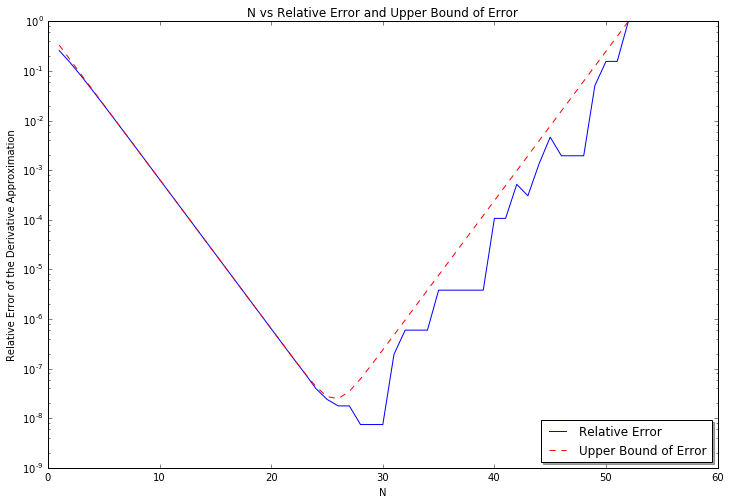

In [12]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.semilogy(n, r, "b-", label="Relative Error")
ax.semilogy(n, R, "r--", label="Upper Bound of Error")
ax.set_title("N vs Relative Error and Upper Bound of Error")
ax.set_xlabel("N")
ax.set_ylabel("Relative Error of the Derivative Approximation")

legendPlot3 = ax.legend(loc="lower right", shadow=True)

As n gets larger (making h approach zero) the relative error continues to get smaller until around n = 30. The change in this trend is caused by floating point representation in a computer. The smaller a number gets the more it must be rounded to a double-precision machine floating point number. This rounding make increases the relative error because the machine is no longer using the exact value calculated but one close to the calculated value. The jumps in the graphs and the flat lines of the relative error are caused by multiple $h^{-n}$ values rounding to the same double-precision machine floating point number. The best approximation for this function would be when n is 30 because that is the point at which the relative error is the least. However, the error quickly rises for values of n > 30 and after 30 the relative error fluctuates greatly

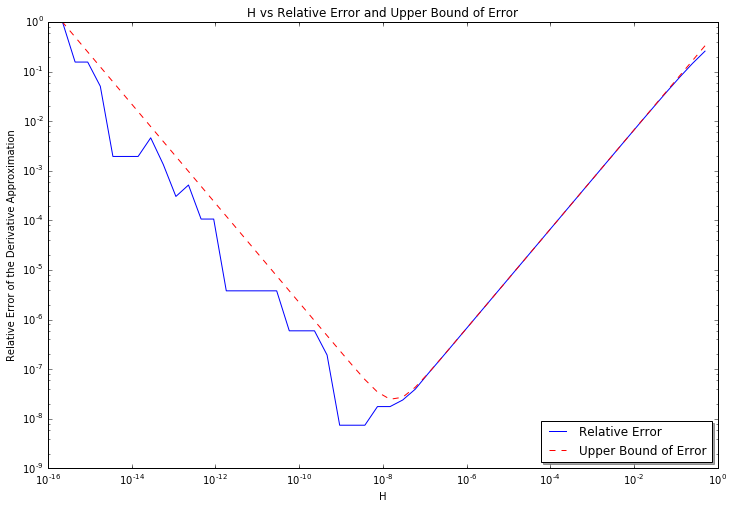

In [7]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.loglog(h, r, "b-", label="Relative Error")
ax.loglog(h, R, "r--", label="Upper Bound of Error")
ax.set_title("H vs Relative Error and Upper Bound of Error")
ax.set_xlabel("H")
ax.set_ylabel("Relative Error of the Derivative Approximation")

legendPlot4 = ax.legend(loc="lower right", shadow=True)

The same phenomenon can be seen in this graph as in the one above. This time however I am graphing using the actual values of H instead of the value of n. Here you can clearly see as h approaches zero the relative error decreasing until h hits the point at which double-precision machine floating point number rounding becomes an issue (right around $10^{-9}$). From that point on to zero any decrease in h does not result in a decrease of the relative error for the approximation of $f'(x)$ This discrepancy is caused by the same constraint as in the graph above. Machines cannot represent every floating point number with 100% accuracy and some must be rounded to the nearest double-precision machine floating point number

### proj1_b.cpp

```cpp
/* Project - Project 1: Part B
 * Professor - Dr. Xu
 * Date - 9/15/16
 * Author - Jake Rowland
 * Purpose - Find the relative error and upper bounds in approximating a fuctions derivative.
*/


#include <vector>
#include <cmath>
#include <iostream>
#include <fstream>

//Represents f(x) = x^{-3}
double fx(double x)
{
	return pow(x,-3);
}

//Represents f'(x) = -3x^{-4}
double fPrime(double x)
{
	return -3 * pow(x,-4);
}

//Represents f"(x) = 12x^{-5}
double fDoublePrime(double x)
{
	return 12 * pow(x, -5);
}

//Calcuates the error in approximating the derivative of a fuction
int main()
{
	//Create the decreasing interaval for the standard derivative formula
	std::vector<int> n;
	std::vector<double> h;

	for(int i = 1; i <= 52; i++)
	{
		n.push_back(i);
		h.push_back(pow(2,-i));
	}

	//Create vector for approximate error(r) and upper bound error(R)
	std::vector<double> r;
	std::vector<double> R;

	//Create three constants to reduce arithmatic overhead
	double fConst = fx(3);
	double fPrimeConst = fPrime(3);
	double fDoubleConst = fDoublePrime(3);

	//Create constant u to represnt error in rounding to dpMachine numbers
	double u = pow(2,-52)/2;

	//Create constant for the upper bound error
	double c1 = std::abs( fDoubleConst / ( 2 * fPrimeConst ) );
	double c2 = std::abs( ( fConst * pow(2,-52) / fPrimeConst));

	//Calculate the errors for decreasing values of h
	for (int i = 0; i < h.size(); ++i)
	{
		r.push_back(std::abs((fPrimeConst - ((fx(3+h[i]) - fConst) / h[i])) / fPrimeConst));
		R.push_back(c1*h[i] + c2*(1/h[i]));
	}

	//Create file objects to trasnfer r and R to txt files
	std::ofstream nFile;
	std::ofstream hFile;
	std::ofstream rFile;
	std::ofstream RFile;

	//Open txt files
	nFile.open("n.txt");
	hFile.open("h.txt");
	rFile.open("r.txt");
	RFile.open("R.txt");

	//Write to txt files
	for (int i = 0; i < r.size(); ++i)
	{
		nFile << n[i] << "\n";
		hFile << h[i] << "\n";
		rFile << r[i] << "\n";
		RFile << R[i] << "\n";
	}

	//Clsoe files
	nFile.close();
	hFile.close();
	rFile.close();
	RFile.close();
}
```